https://radimrehurek.com/gensim/models/word2vec.html

https://rare-technologies.com/word2vec-tutorial/

In [2]:
import collections
import gensim
from gensim.models import word2vec
import logging
import numpy as np

# Cargo dataset

In [5]:
sentences = np.load('news_sentences.npy')

In [8]:
print(sentences[0])
print(sentences[1])

['macron', 'takes', 'europe', 'center', 'stage', 'while', 'merkel', 'falters']
['french', 'president', 'emmanuel', 'macron', 'looks', 'like', 'the', 'last', 'best', 'hope', 'to', 'salvage', 'a', 'unified', 'europe', 'as', 'britain', 'drifts', 'away', 'and', 'germany', 'bogs', 'down']


In [9]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# sg = 1 -> skipgram. sg=0 -> CBOW
# size -> Dimención de features a la salida (Palabras)
# min_count -> si no aparece mas de min_count, la palabra no forma parte del diccionario
# iter -> Cantidad de epochs
model = gensim.models.Word2Vec(sentences, iter=100, min_count=10, size=300, workers=4, sg=0)

2017-11-22 20:59:13,735 : INFO : collecting all words and their counts
2017-11-22 20:59:13,738 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-22 20:59:13,826 : INFO : PROGRESS: at sentence #10000, processed 162267 words, keeping 20866 word types
2017-11-22 20:59:13,932 : INFO : PROGRESS: at sentence #20000, processed 323702 words, keeping 30856 word types
2017-11-22 20:59:14,047 : INFO : PROGRESS: at sentence #30000, processed 488907 words, keeping 39448 word types
2017-11-22 20:59:14,161 : INFO : PROGRESS: at sentence #40000, processed 649326 words, keeping 46973 word types
2017-11-22 20:59:14,251 : INFO : PROGRESS: at sentence #50000, processed 810570 words, keeping 53326 word types
2017-11-22 20:59:14,337 : INFO : PROGRESS: at sentence #60000, processed 971904 words, keeping 59184 word types
2017-11-22 20:59:14,452 : INFO : PROGRESS: at sentence #70000, processed 1134642 words, keeping 64707 word types
2017-11-22 20:59:14,486 : INFO : collected 66

2017-11-22 21:00:17,983 : INFO : PROGRESS: at 32.12% examples, 447663 words/s, in_qsize 8, out_qsize 0
2017-11-22 21:00:18,998 : INFO : PROGRESS: at 32.81% examples, 450033 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:00:20,013 : INFO : PROGRESS: at 33.30% examples, 449694 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:00:21,017 : INFO : PROGRESS: at 33.97% examples, 451667 words/s, in_qsize 6, out_qsize 1
2017-11-22 21:00:22,019 : INFO : PROGRESS: at 34.60% examples, 453178 words/s, in_qsize 7, out_qsize 1
2017-11-22 21:00:23,025 : INFO : PROGRESS: at 35.26% examples, 455039 words/s, in_qsize 8, out_qsize 0
2017-11-22 21:00:24,040 : INFO : PROGRESS: at 35.91% examples, 456574 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:00:25,044 : INFO : PROGRESS: at 36.57% examples, 458358 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:00:26,070 : INFO : PROGRESS: at 37.08% examples, 457960 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:00:27,081 : INFO : PROGRESS: at 37.71% examples, 459217 wor

2017-11-22 21:01:39,026 : INFO : PROGRESS: at 84.08% examples, 512181 words/s, in_qsize 6, out_qsize 1
2017-11-22 21:01:40,039 : INFO : PROGRESS: at 84.76% examples, 512779 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:01:41,059 : INFO : PROGRESS: at 85.46% examples, 513389 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:01:42,095 : INFO : PROGRESS: at 86.15% examples, 513879 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:01:43,112 : INFO : PROGRESS: at 86.83% examples, 514343 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:01:44,154 : INFO : PROGRESS: at 87.50% examples, 514704 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:01:45,168 : INFO : PROGRESS: at 88.17% examples, 515153 words/s, in_qsize 8, out_qsize 1
2017-11-22 21:01:46,171 : INFO : PROGRESS: at 88.84% examples, 515642 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:01:47,180 : INFO : PROGRESS: at 89.46% examples, 515812 words/s, in_qsize 8, out_qsize 0
2017-11-22 21:01:48,199 : INFO : PROGRESS: at 90.16% examples, 516375 wor

In [25]:
print('Tamaño del vocabulario:', len(model.wv.vocab))

Tamaño del vocabulario: 10161


In [15]:
model.wv.most_similar('macron')

2017-11-22 21:04:35,000 : INFO : precomputing L2-norms of word weight vectors


[('emmanuel', 0.6874169707298279),
 ('lebanon', 0.38074779510498047),
 ('mnangagwa', 0.3652341961860657),
 ('merkel', 0.35583463311195374),
 ('hariri', 0.32891011238098145),
 ('puigdemont', 0.32218652963638306),
 ('fein', 0.32000547647476196),
 ('french', 0.3191135823726654),
 ('angela', 0.31758278608322144),
 ('sinn', 0.30697691440582275)]

In [16]:
model.wv.most_similar('president')

[('emmerson', 0.39636561274528503),
 ('leader', 0.38140949606895447),
 ('presidential', 0.3585161566734314),
 ('vp', 0.35196831822395325),
 ('mnangagwa', 0.3393004834651947),
 ('vice-president', 0.33660781383514404),
 ('chairman', 0.3334839344024658),
 ('senator', 0.33061692118644714),
 ('trump', 0.32308077812194824),
 ('minister', 0.31653210520744324)]

In [17]:
model.wv.most_similar('tennis')

[('novotna', 0.35020777583122253),
 ('two-time', 0.3160136938095093),
 ('championships', 0.3125612735748291),
 ('jana', 0.30783870816230774),
 ('49', 0.2997034192085266),
 ('tillis', 0.29107579588890076),
 ('neymar', 0.29003727436065674),
 ('atp', 0.2876241207122803),
 ('czech', 0.28633925318717957),
 ('wimbledon', 0.28544119000434875)]

In [20]:
model.wv.most_similar('trump')

[('trump:', 0.5398653745651245),
 ('tusk', 0.4619671702384949),
 ('obama', 0.3607010245323181),
 ('vladimir', 0.34792083501815796),
 ('president', 0.32308077812194824),
 ('his', 0.31239354610443115),
 ('he', 0.3101910650730133),
 ('strongly', 0.3096417188644409),
 ('uhuru', 0.29866400361061096),
 ('sessions', 0.29597556591033936)]

In [22]:
model.wv.most_similar('he')

[('she', 0.7207295894622803),
 ('it', 0.5462445616722107),
 ('they', 0.45564812421798706),
 ('his', 0.4413456320762634),
 ('i', 0.40158697962760925),
 ('her', 0.39762502908706665),
 ('him', 0.3903670310974121),
 ('nobody', 0.38877683877944946),
 ('“i', 0.35906273126602173),
 ('wenger', 0.3407129645347595)]

# Bigram model

In [26]:
bigram_transformer = gensim.models.Phrases(sentences)

2017-11-22 21:08:11,058 : INFO : collecting all words and their counts
2017-11-22 21:08:11,060 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2017-11-22 21:08:11,562 : INFO : PROGRESS: at sentence #10000, processed 162267 words and 114510 word types
2017-11-22 21:08:12,020 : INFO : PROGRESS: at sentence #20000, processed 323702 words and 196859 word types
2017-11-22 21:08:12,483 : INFO : PROGRESS: at sentence #30000, processed 488907 words and 273411 word types
2017-11-22 21:08:12,932 : INFO : PROGRESS: at sentence #40000, processed 649326 words and 345083 word types
2017-11-22 21:08:13,451 : INFO : PROGRESS: at sentence #50000, processed 810570 words and 411549 word types
2017-11-22 21:08:13,938 : INFO : PROGRESS: at sentence #60000, processed 971904 words and 475309 word types
2017-11-22 21:08:14,423 : INFO : PROGRESS: at sentence #70000, processed 1134642 words and 536781 word types
2017-11-22 21:08:14,584 : INFO : collected 556123 word types from a corpus of 

In [27]:
bigram = gensim.models.phrases.Phraser(bigram_transformer)

2017-11-22 21:08:21,225 : INFO : source_vocab length 556123
2017-11-22 21:08:29,652 : INFO : Phraser built with 7246 7246 phrasegrams


In [28]:
bigram_sentences = []
for sentence in sentences:
    bigram_sentences.append(bigram[sentence])
print(bigram_sentences[:2])

[['macron', 'takes', 'europe', 'center_stage', 'while', 'merkel', 'falters'], ['french_president', 'emmanuel_macron', 'looks_like', 'the', 'last', 'best', 'hope', 'to', 'salvage', 'a', 'unified', 'europe', 'as', 'britain', 'drifts', 'away', 'and', 'germany', 'bogs', 'down']]


In [30]:
word_vect_size=300
model = gensim.models.Word2Vec(bigram_sentences, iter=100, min_count=10, size=word_vect_size, workers=4, batch_words=1000)

2017-11-22 21:09:01,050 : INFO : collecting all words and their counts
2017-11-22 21:09:01,052 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-11-22 21:09:01,143 : INFO : PROGRESS: at sentence #10000, processed 145058 words, keeping 24233 word types
2017-11-22 21:09:01,195 : INFO : PROGRESS: at sentence #20000, processed 288134 words, keeping 35449 word types
2017-11-22 21:09:01,297 : INFO : PROGRESS: at sentence #30000, processed 434917 words, keeping 44809 word types
2017-11-22 21:09:01,406 : INFO : PROGRESS: at sentence #40000, processed 578447 words, keeping 52812 word types
2017-11-22 21:09:01,479 : INFO : PROGRESS: at sentence #50000, processed 722356 words, keeping 59471 word types
2017-11-22 21:09:01,545 : INFO : PROGRESS: at sentence #60000, processed 866920 words, keeping 65530 word types
2017-11-22 21:09:01,628 : INFO : PROGRESS: at sentence #70000, processed 1012893 words, keeping 71185 word types
2017-11-22 21:09:01,651 : INFO : collected 72

2017-11-22 21:10:04,603 : INFO : PROGRESS: at 30.40% examples, 364459 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:10:05,605 : INFO : PROGRESS: at 30.95% examples, 365033 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:10:06,606 : INFO : PROGRESS: at 31.48% examples, 365538 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:10:07,606 : INFO : PROGRESS: at 32.01% examples, 365946 words/s, in_qsize 8, out_qsize 0
2017-11-22 21:10:08,610 : INFO : PROGRESS: at 32.41% examples, 364998 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:10:09,615 : INFO : PROGRESS: at 32.75% examples, 363246 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:10:10,621 : INFO : PROGRESS: at 33.24% examples, 363178 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:10:11,624 : INFO : PROGRESS: at 33.59% examples, 361759 words/s, in_qsize 8, out_qsize 0
2017-11-22 21:10:12,624 : INFO : PROGRESS: at 34.11% examples, 362113 words/s, in_qsize 8, out_qsize 0
2017-11-22 21:10:13,625 : INFO : PROGRESS: at 34.63% examples, 362393 wor

2017-11-22 21:11:24,788 : INFO : PROGRESS: at 68.26% examples, 357108 words/s, in_qsize 6, out_qsize 1
2017-11-22 21:11:25,789 : INFO : PROGRESS: at 68.63% examples, 356577 words/s, in_qsize 8, out_qsize 0
2017-11-22 21:11:26,792 : INFO : PROGRESS: at 69.11% examples, 356546 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:11:27,795 : INFO : PROGRESS: at 69.56% examples, 356379 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:11:28,801 : INFO : PROGRESS: at 69.96% examples, 355990 words/s, in_qsize 7, out_qsize 1
2017-11-22 21:11:29,801 : INFO : PROGRESS: at 70.42% examples, 355888 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:11:30,806 : INFO : PROGRESS: at 70.78% examples, 355282 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:11:31,808 : INFO : PROGRESS: at 71.14% examples, 354705 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:11:32,809 : INFO : PROGRESS: at 71.59% examples, 354539 words/s, in_qsize 7, out_qsize 0
2017-11-22 21:11:33,810 : INFO : PROGRESS: at 72.04% examples, 354453 wor

In [31]:
len(model.wv.vocab)

12416

In [168]:
testing_words = ['emmanuel_macron','donald_trump', 'it', 'europe', 'man', 'police', 'today', 'tv', 'apple']
def test():
    all_tested_words = []
    for word in testing_words:
        print('Cercanos a',word+":")
        all_tested_words.append(word)
        for name in model.wv.most_similar(word):
            all_tested_words.append(name[0])
            print(name)
        print()
    return list(set(all_tested_words))
all_tested_words = test()

Cercanos a emmanuel_macron:
('french_president', 0.6350289583206177)
('saad_hariri', 0.5132941603660583)
('lebanon_hariri', 0.4557216167449951)
('macron', 0.4391801059246063)
('lebanon_prime', 0.4104675054550171)
('lebanese_pm', 0.39740079641342163)
('minister_saad', 0.3885466456413269)
('lebanese_prime', 0.3862132132053375)
('amid_political', 0.3807012736797333)
('mugabe:', 0.3806951344013214)

Cercanos a donald_trump:
('trump', 0.5323281288146973)
('president_trump', 0.3977694809436798)
('court_justice', 0.3364027738571167)
('hillary_clinton', 0.3348393142223358)
('sean_hannity', 0.32193052768707275)
('president', 0.31820452213287354)
('steve_bannon', 0.30119654536247253)
('jeff_sessions', 0.29167214035987854)
('martin_truex', 0.2904866337776184)
('mr_trump', 0.28935468196868896)

Cercanos a it:
('that', 0.5028278827667236)
('the', 0.5022345185279846)
('a', 0.4582276940345764)
('this', 0.4537467658519745)
('she', 0.433323472738266)
('they', 0.4139060080051422)
('to', 0.41305428743362

In [169]:
len(all_tested_words)

99

In [170]:
added_words_num = 2*len(all_tested_words)
vectors = np.zeros((len(all_tested_words)+added_words_num, word_vect_size))
i = 0
for word, word_obj in model.wv.vocab.items():
    if word not in all_tested_words:
        vectors[i+len(all_tested_words)] = model.wv[word]
        i+=1
    if i==added_words_num:
        break
print(vectors)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.12011316 -0.23328996 -0.15266098 ..., -0.21800353 -0.15564781
   0.10615023]
 [ 0.09045926 -0.10044033 -0.52642542 ..., -0.79882276  0.20129937
   0.82089633]
 [ 2.90730548 -1.39714932  0.99186498 ..., -3.0817914  -2.45613241
   1.48174703]]


In [171]:
#vectors = np.zeros((len(all_tested_words)+added_words_num, word_vect_size))
for i, word in enumerate(all_tested_words):
    vectors[i] = model.wv[word]

#for in 
print(vectors)

[[ 0.57470059 -1.33210158  2.65049887 ...,  0.55237567  1.09540248
  -0.5081749 ]
 [ 0.40370882 -0.18534799 -0.33804473 ...,  0.70377034 -0.26172075
  -0.23167105]
 [-0.47422823  0.77960718  0.15457042 ...,  0.57905179  0.05866572
   0.62533939]
 ..., 
 [ 0.12011316 -0.23328996 -0.15266098 ..., -0.21800353 -0.15564781
   0.10615023]
 [ 0.09045926 -0.10044033 -0.52642542 ..., -0.79882276  0.20129937
   0.82089633]
 [ 2.90730548 -1.39714932  0.99186498 ..., -3.0817914  -2.45613241
   1.48174703]]


In [172]:
# Calculo T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
low_dim_embs = tsne.fit_transform(vectors)

In [181]:
# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(9.8, 7))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<IPython.core.display.Javascript object>


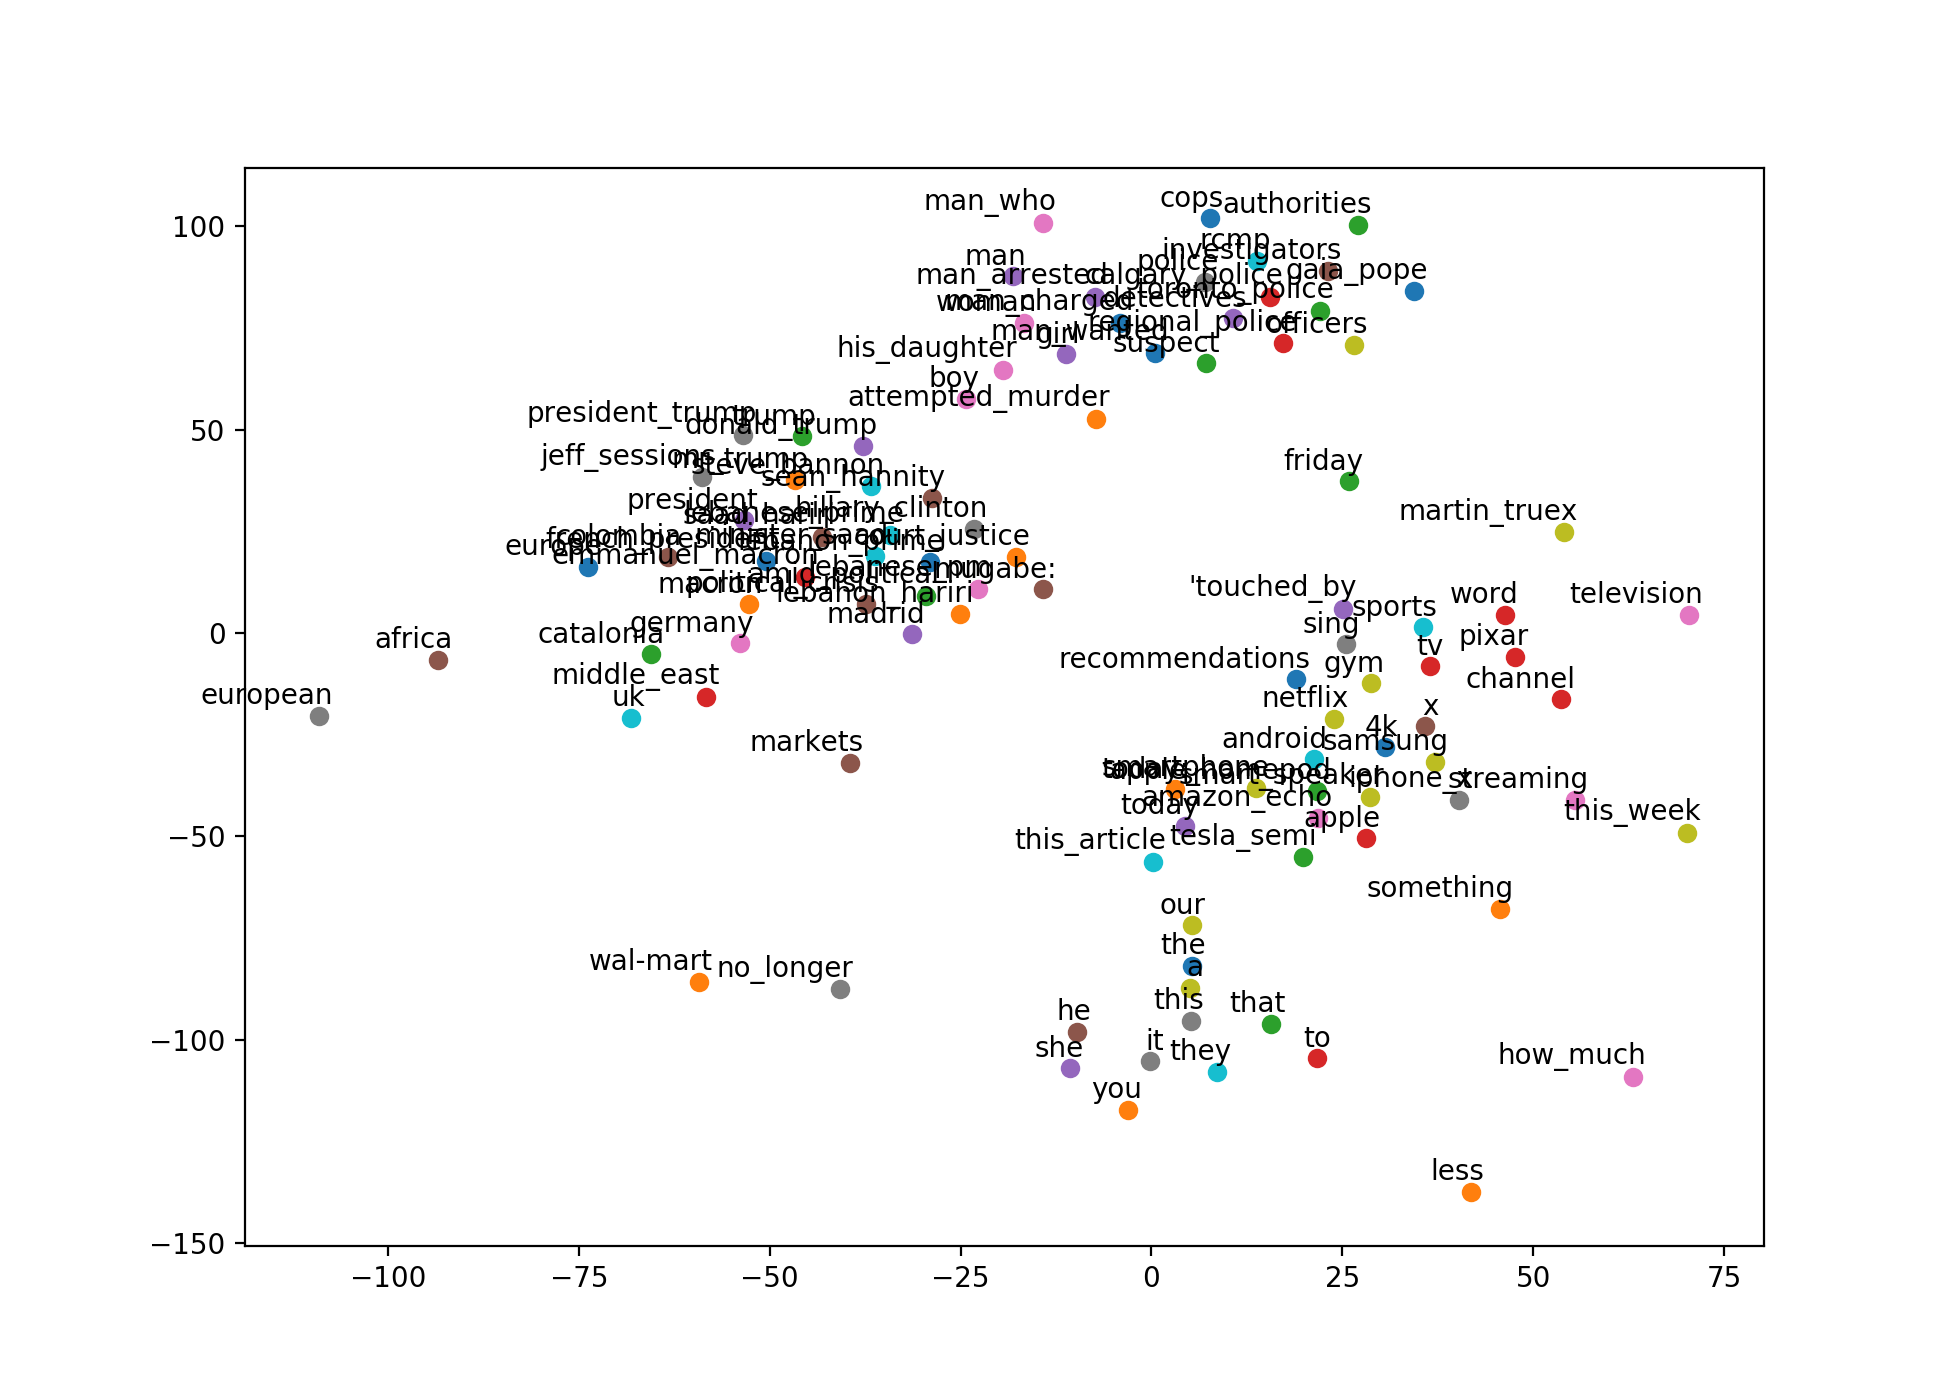

In [183]:
import os
%matplotlib notebook
plot_with_labels(low_dim_embs[:len(all_tested_words)], all_tested_words)

In [47]:
words_counts = []
for word, vocab_obj in model.wv.vocab.items():
    words_counts.append((word, vocab_obj.count))

In [51]:
words_counts[1]

('takes', 258)

# Puede devolver un keras_embedding layer!!!

In [35]:
model.wv.get_keras_embedding()

Using TensorFlow backend.
